## Machine Learning - Supervised - Binary classification - KNN

In [1]:
## Lets import necessary python libraries
import numpy as np # Numerical Python library used to perform numerical operations
import pandas as pd # Pandas library used to handle and analyze structured data
import matplotlib.pyplot as plt # Plotting library
import seaborn as sns # Additional plotting library built over matplotlib (better visuals)
sns.set_theme(style='darkgrid',palette='viridis')

In [2]:
%matplotlib inline
import string # This library will help us perform operations on string values

In [3]:
## Lets import the loan data set and load iti nto a dataframe 
df = pd.read_csv(r"C:\Users\gmraj\Documents\Refactored_Py_DS_ML_Bootcamp-master\15-Decision-Trees-and-Random-Forests\loan_data.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [9]:
## Exploratory Data Analysis
## Data Wrangling, Feature Consolidation/Engineering

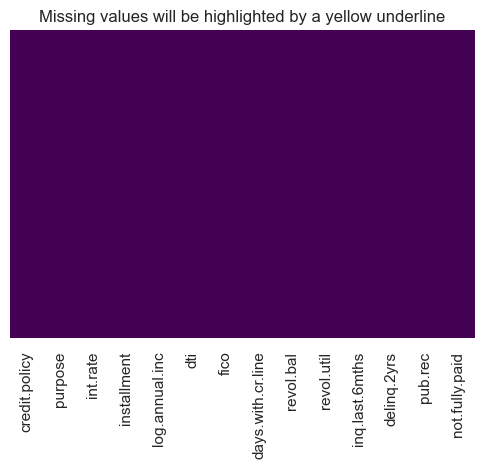

In [15]:
## Checking for missing values
plt.figure(figsize=(6,4))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.title('Missing values will be highlighted by a yellow underline')
plt.show()

In [17]:
## No missing value found

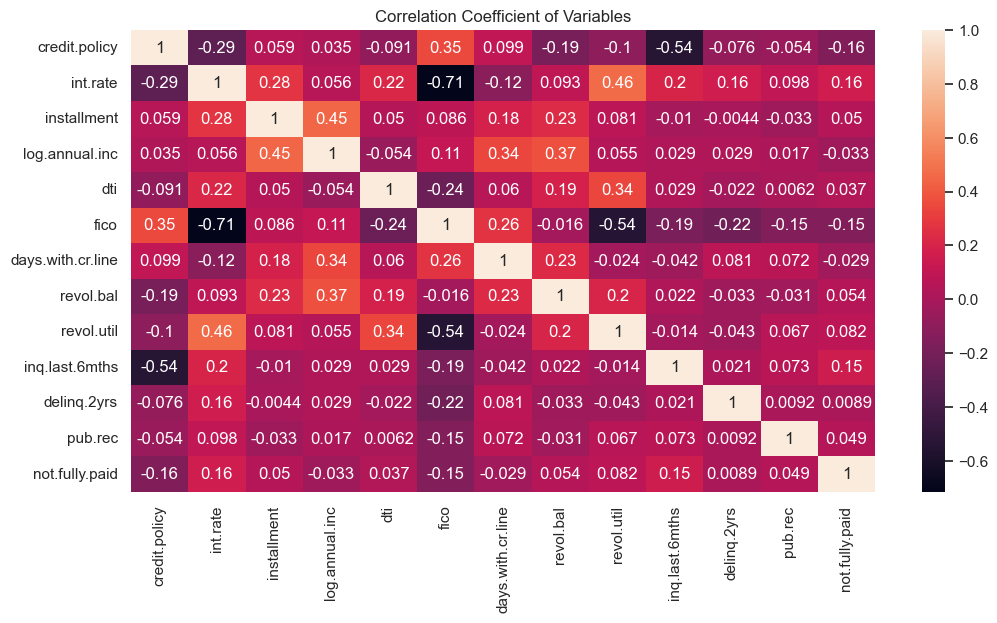

In [23]:
## Lets check for correlation of the independent variables
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(numeric_only=True),annot=True)
plt.title('Correlation Coefficient of Variables')
plt.show()

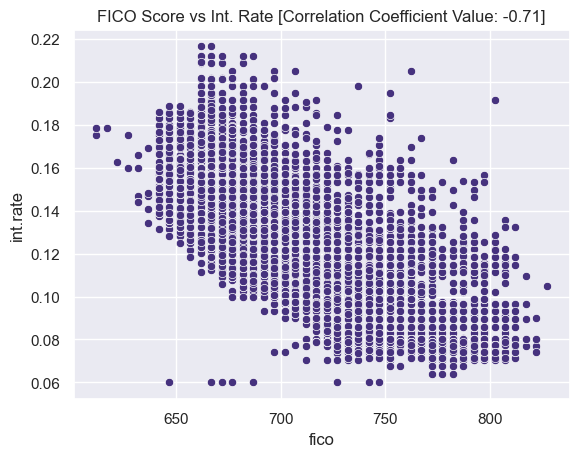

In [29]:
sns.scatterplot(x='fico',y='int.rate',data=df)
plt.title('FICO Score vs Int. Rate [Correlation Coefficient Value: -0.71]')
plt.show()

In [31]:
## As observed from the Heatmap, there is negative correlation with the coefficient value of -0.71 between FICO and Int. Rate
## As the FICO goes up, the Int. Rate goes down and vice verca

In [102]:
df.head(3)

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0


In [140]:
## Lets create a new dataframe by tweaking existing one in such a way that we obtain
## purpose wise percentage of all the loans which are not fully paid

In [122]:
purpose_groupby = df.groupby('purpose')['not.fully.paid'].describe()
purpose_groupby = pd.DataFrame(purpose_groupby)

In [136]:
purpose_groupby = purpose_groupby.sort_values(by='mean',ascending=True)

In [138]:
purpose_groupby

,count,mean,std,min,25%,50%,75%,max
purpose,,,,,,,,
major_purchase,437.0,0.112128,0.315886,0.0,0.0,0.0,0.0,1.0
credit_card,1262.0,0.115689,0.319979,0.0,0.0,0.0,0.0,1.0
debt_consolidation,3957.0,0.152388,0.359442,0.0,0.0,0.0,0.0,1.0
all_other,2331.0,0.166023,0.372181,0.0,0.0,0.0,0.0,1.0
home_improvement,629.0,0.170111,0.376030,0.0,0.0,0.0,0.0,1.0
educational,343.0,0.201166,0.401458,0.0,0.0,0.0,0.0,1.0
small_business,619.0,0.277868,0.448310,0.0,0.0,0.0,1.0,1.0


In [143]:
## Here we can see that 'small_busines' category has highest amount of loans which are not fully paid
## where as 'major_purchase' and 'credit_card' has the highest amount of loans which are fully paid

In [ ]:
## Lets now feature engineer the existing dataframe so it becomes ML algorithm ready

In [145]:
## We will have to encode all the categorical variables so that all the data in the dataframe is in numerical values

In [18]:
purpose = pd.get_dummies(df['purpose'],drop_first=True,dtype='float')
df.drop('purpose',axis=1,inplace=True)

In [24]:
df = pd.concat([df,purpose],axis=1)

In [19]:
df.head(5)

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [28]:
## Standardize the dataset

In [30]:
from sklearn.model_selection import train_test_split # to split the dataframe into a training and a testing set
from sklearn.preprocessing import StandardScaler # to standardize the dataframe values so that the values are standarized on a single x axis
from sklearn.tree import DecisionTreeClassifier # Decision Tree Algorithm (estimator)
from sklearn.pipeline import Pipeline # to automate the steps

In [32]:
X = df.drop('not.fully.paid',axis=1)

In [37]:
y = df['not.fully.paid']

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [44]:
## Creating a pipeline that will first standardize the values and the pass them through the Decision Tree estimator
pipes = Pipeline([
    ('scaler',StandardScaler()),
    ('dec_tree',DecisionTreeClassifier())
])

In [46]:
pipes.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('dec_tree', DecisionTreeClassifier())])

In [152]:
## Importing metrics required for performance evaluation
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [50]:
predict_pipe = pipes.predict(X_test)

In [52]:
print(classification_report(y_test,predict_pipe))
print('\n')
print(confusion_matrix(y_test,predict_pipe))

              precision    recall  f1-score   support

           0       0.84      0.84      0.84      2620
           1       0.24      0.24      0.24       541

    accuracy                           0.74      3161
   macro avg       0.54      0.54      0.54      3161
weighted avg       0.74      0.74      0.74      3161



[[2208  412]
 [ 413  128]]


### Decision Tree estimator produced result of 74% accuracy

## Random Forest method

In [55]:
from sklearn.ensemble import RandomForestClassifier

In [65]:
pipes_rf = Pipeline([
    ('scaler_rf',StandardScaler()),
    ('rc_classifier',RandomForestClassifier(n_estimators=200))
])

In [66]:
pipes_rf.fit(X_train, y_train)

Pipeline(steps=[('scaler_rf', StandardScaler()),
                ('rc_classifier', RandomForestClassifier(n_estimators=200))])

In [67]:
predict_rf = pipes_rf.predict(X_test)

In [68]:
print(classification_report(y_test,predict_rf))
print('\n')
print(confusion_matrix(y_test,predict_rf))

              precision    recall  f1-score   support

           0       0.83      1.00      0.91      2620
           1       0.47      0.01      0.03       541

    accuracy                           0.83      3161
   macro avg       0.65      0.51      0.47      3161
weighted avg       0.77      0.83      0.76      3161



[[2611    9]
 [ 533    8]]


### Random Forest estimator produced a result of 83% accuracy

## Thank You